In [56]:
import numpy as np
import matplotlib.pyplot as plt
from lab2_proto import *
from prondict import prondict

# 3) Data and Model set

In [57]:
data = np.load('lab2_data.npz', allow_pickle=True)['data']
#phoneHMMs = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()
phoneHMMs = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()

In [58]:
list(sorted(phoneHMMs.keys()))

['ah',
 'ao',
 'ay',
 'eh',
 'ey',
 'f',
 'ih',
 'iy',
 'k',
 'n',
 'ow',
 'r',
 's',
 'sil',
 'sp',
 't',
 'th',
 'uw',
 'v',
 'w',
 'z']

In [59]:
phoneHMMs['ah'].keys()

dict_keys(['name', 'startprob', 'transmat', 'means', 'covars'])

# 4) Concatenating HMMs

In [60]:
isolated = {}
for digit in prondict.keys():
    isolated[digit] = ['sil'] + prondict[digit] + ['sil']

In [61]:
wordHMMs = {}
print(isolated['o'])
wordHMMs['o'] = concatHMMs(phoneHMMs, isolated['o'])
wordHMMs['o']

['sil', 'ow', 'sil']


{'name': 'sil+ow+sil',
 'startprob': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'transmat': array([[0.8833106 , 0.1166894 , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.9164465 , 0.08355348, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.802877  , 0.197123  , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.8148277 , 0.1851723 ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.8436188 ,
         0.1563813 , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.8662466 , 0.1337534 , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,

In [62]:
example = np.load('lab2_example.npz', allow_pickle=True)['example'].item()
list(example.keys())

['filename',
 'samplingrate',
 'gender',
 'speaker',
 'digit',
 'repetition',
 'samples',
 'lmfcc',
 'obsloglik',
 'logalpha',
 'loglik',
 'vloglik',
 'vpath',
 'logbeta',
 'loggamma']

In [63]:
means = wordHMMs['o']['means']
covars = wordHMMs['o']['covars']
obsloglik = log_multivariate_normal_density_diag(example['lmfcc'], means, covars)
(example['obsloglik'] - log_multivariate_normal_density_diag(example['lmfcc'], wordHMMs['o']['means'], wordHMMs['o']['covars']))[:4]

array([[ -2.3493781 ,  -3.19344776,  -0.56117157,   7.79580317,
        -65.6905096 ,  -0.22217845,  -2.3493781 ,  -3.19344776,
         -0.56117157],
       [  1.73102783,  -3.99908285,   0.71718317,  13.58800656,
        -64.07430998,   1.4860927 ,   1.73102783,  -3.99908285,
          0.71718317],
       [ -0.82369043,  -2.4787927 ,  -0.49890299,   8.08159607,
        -62.45057794,   4.28829773,  -0.82369043,  -2.4787927 ,
         -0.49890299],
       [  0.92566206,  -0.88845807,   1.43028737,  11.53874171,
        -63.14913814,   2.49438041,   0.92566206,  -0.88845807,
          1.43028737]])

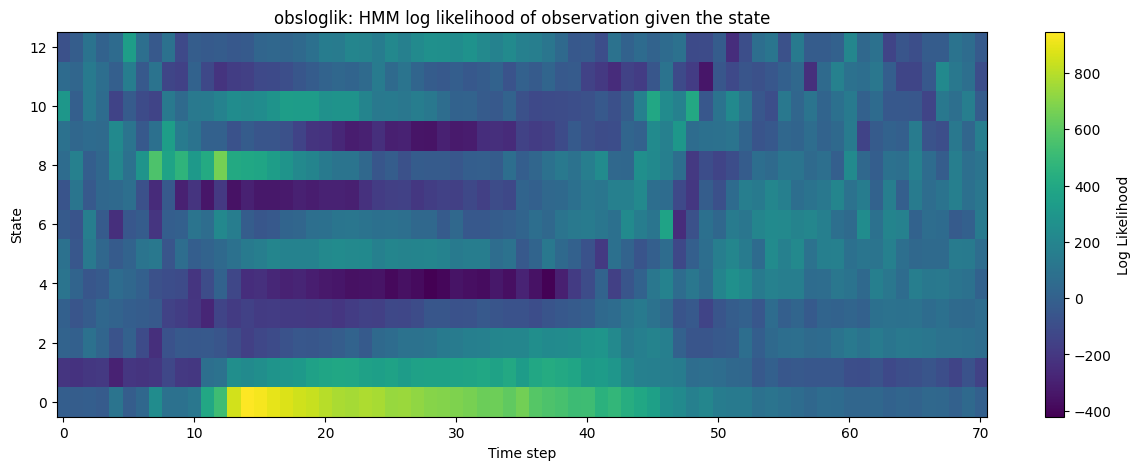

In [64]:
plt.figure(figsize=(15, 5))
plt.imshow(example['lmfcc'].T, aspect='auto', origin='lower', cmap='viridis', interpolation='none')
plt.colorbar(label='Log Likelihood')
plt.xlabel('Time step')
plt.ylabel('State')
plt.title('obsloglik: HMM log likelihood of observation given the state')
plt.show()

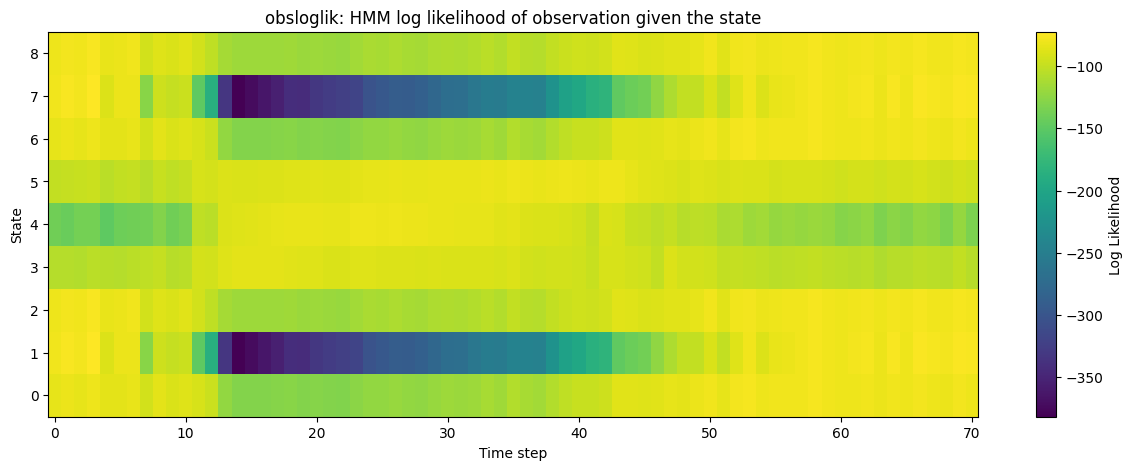

In [65]:
plt.figure(figsize=(15, 5))
plt.imshow(obsloglik.T, aspect='auto', origin='lower', cmap='viridis', interpolation='none')
plt.colorbar(label='Log Likelihood')
plt.xlabel('Time step')
plt.ylabel('State')
plt.title('obsloglik: HMM log likelihood of observation given the state')
plt.show()


* What can you say about the figure? \
answer

* Which Gaussian components give the high likelihood in which time steps? Why? Remember that each utterance starts and ends with silence. \
answer

In [66]:
data = np.load('lab2_data.npz', allow_pickle=True)['data']